In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import turtle as t

In [3]:
img1 = cv2.imread('15.jpg')
img2  = cv2.resize(img1 , (500,400))


In [4]:
#Step 1:-
#    Find Edge Map using built in canny edge detector function
#    In this function, first parameter is input image, second is Low threshold and third is high threshold
edge_map = cv2.Canny(img2,100,200) 

(-0.5, 499.5, 399.5, -0.5)

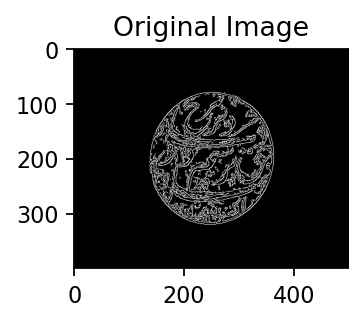

In [5]:
# Showing edge map
plt.figure(dpi = 160)

plt.subplot(2, 2, 1)
plt.imshow(edge_map , 'gray')
plt.title('Original Image')
plt.axis('on')

In [6]:
#Step 2:-
#   Making hough space for circle with parameters (a , b , r)
#   Get image dimensions
#   y for rows and x for columns 
#Max diatance is diagonal one 
maxdist = int(np.round(np.sqrt(edge_map.shape[0]**2 + edge_map.shape[1]** 2)))
print(maxdist)

640


In [7]:
#making accumulator array
accumulator_3d =  np.zeros((edge_map.shape[0] , edge_map.shape[1] ,
                            maxdist))
radius = np.arange(10,70)

In [8]:
I_x = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude and angle
magnitude, angle1 = cv2.cartToPolar(I_x, I_y, angleInDegrees=True)


In [9]:
for y in range(edge_map.shape[1]):
    for x in range(edge_map.shape[0]):
        if edge_map[x,y] > 0:
            for r_idx , r in enumerate(radius):  # r_idx keep track f current radius and r is the value of radius
                a = int(x - r * np.cos(angle1[x][y])[0])
                b = int(y - r * np.sin(angle1[x][y])[0])
                if a >= 0 and a < edge_map.shape[0]  and b >=0 and b < edge_map.shape[1]:
                     accumulator_3d[a][b][r_idx] += 1

In [13]:
# Calculate the 80th percentile
pct = round(np.percentile(accumulator_3d, 80))
print(pct)

0.0


In [14]:
x , y ,  r = np.where( accumulator_3d > pct)
center = np.max(np.maximum(x, x))
radius = np.max(r)
print(center)
print(radius)

377
59


In [12]:
t.penup()
t.goto(int(center),0)
t.pendown()

# draw the circle
t.circle(radius)

# exit the turtle window when done
t.done()